In [5]:
import cv2
import numpy as np

In [14]:
img = cv2.cvtColor( cv2.imread('../low_dpi.png'), cv2.COLOR_BGR2GRAY)

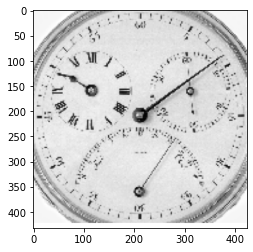

In [15]:
import matplotlib.pyplot as plt
plt.gray()

# 3.23

plt.imshow(img)

In [8]:
from scipy.ndimage import gaussian_filter

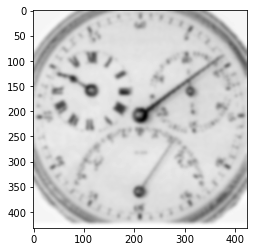

In [14]:
blured = gaussian_filter(img, 3)
plt.imshow(blured)

In [15]:
import numpy as np

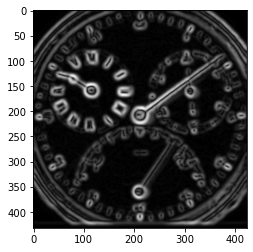

In [22]:
blured_sharp = np.sqrt( cv2.Sobel(blured, cv2.CV_64F, 1, 0)**2 + cv2.Sobel(blured, cv2.CV_64F, 0, 1)**2)

plt.imshow(blured_sharp)

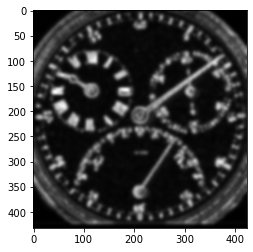

In [23]:
sharp = np.sqrt( cv2.Sobel(img, cv2.CV_64F, 1, 0)**2 + cv2.Sobel(img, cv2.CV_64F, 0, 1)**2)
blured_sharp = gaussian_filter(sharp, 3)

plt.imshow(blured_sharp)

In [7]:
lena = cv2.cvtColor( cv2.imread('../../lena.png'), cv2.COLOR_BGR2GRAY)

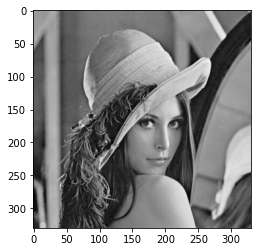

In [25]:
plt.imshow(lena)

In [ ]:
lena_blured_sharp = np.sqrt(cv2.Sobel(blured, cv2.CV_64F, 1, 0)**2 + cv2.Sobel(blured, cv2.CV_64F, 0, 1)**2)

plt.imshow(blured_sharp)

In [ ]:
# 3.25

In [26]:
lap_f = np.array([
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0],
])

stronger_lap_f = np.array([
    [1, 1, 1],
    [1, -8, 1],
    [1, 1, 1],
])

In [27]:
from scipy.ndimage import convolve

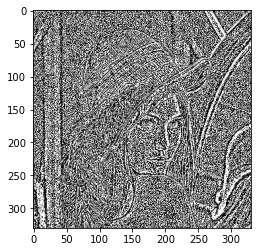

In [29]:
plt.imshow(convolve(lena, lap_f))

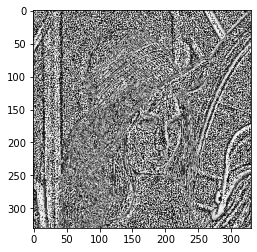

In [30]:
plt.imshow(convolve(lena, stronger_lap_f))

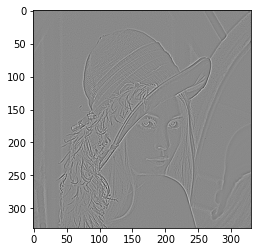

In [38]:
res = cv2.Laplacian(lena, cv2.CV_16S)

plt.imshow(res)

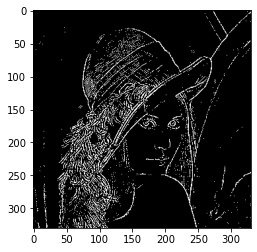

In [53]:
plt.imshow(cv2.threshold(res, 25, 255, cv2.THRESH_BINARY)[1])

In [1]:
# 3.26

In [17]:
sharper_lap_f = np.array([
    [1,1,1,1,1],
    [1,1,1,1,1],
    [1,1,-24,1,1],
    [1,1,1,1,1],
    [1,1,1,1,1],
])

lap_f = np.array([
    [1,1,1],
    [1,-8,1],
    [1,1,1],
])

In [8]:
from scipy.ndimage import convolve

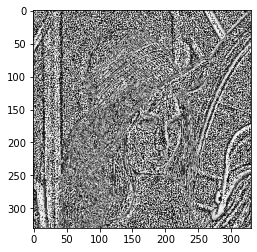

In [18]:
plt.imshow(convolve(lena, lap_f));

In [85]:
# checking out this kinda filter
# 

f1 = np.array((
    [1,1,1,1,1],
[1,0,0,0,1],
[1,0,-16,0,1],
[1,0,0,0,1],
[1,1,1,1,1],
            ))


f2 = np.array((
[1,1,1,1,1,1,1],
[1,0,0,0,0,0,1],
[1,0,0,-4,0,0,1],
[1,0,-4,-12,-4,0,1],
[1,0,0,-4,0,0,1],
[1,0,0,0,0,0,1],
[1,1,1,1,1,1,1],
    
            ))


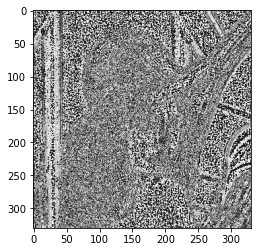

In [34]:
plt.imshow(convolve(lena, f));

In [ ]:
f = np.array((
    [1,1,1,1,1],
[1,0,0,0,1],
[1,0,-16,0,1],
[1,0,0,0,1],
[1,1,1,1,1],
            ))

In [63]:
from scipy.signal import convolve2d

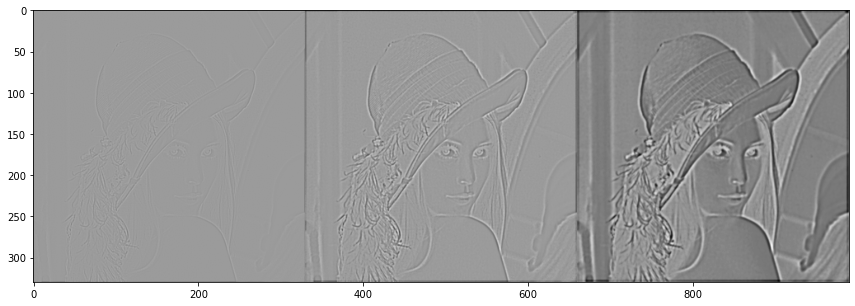

In [86]:
lap_f_res = convolve2d(lena, lap_f, mode='same')
f1_res = convolve2d(lena, f1, mode='same')
f2_res = convolve2d(lena, f2, mode='same')

plt.figure(figsize=(3*5, 5))
plt.imshow(np.hstack([lap_f_res, f1_res, f2_res]))

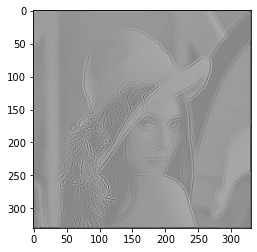

In [91]:
plt.imshow(lena + lap_f_res)

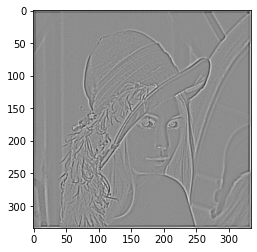

In [70]:
plt.imshow(convolve2d(lena, f))

In [58]:
def do_conv_2d(image, filter_, s=1):
    w2 = (image.shape[1] - filter_.shape[1]) / s + 1
    h2 = (image.shape[0] - filter_.shape[0]) / s+ 1

    if int(str(w2).split('.')[-1]) != 0 or int(str(h2).split('.')[-1]) != 0:
        raise Exception('image shape or filter shape arent valid')
        
    print('w2: ', w2)
    print('h2: ', w2)
    
    w2 = int(w2)
    h2 = int(h2)
    
    fh, fw = filter_.shape
    
    output = np.zeros((w2, h2))
    for i in range(h2):
        for j in range(w2):
            img_sub = image[int(i*s):int(i*s)+fh, int(j*s):int(j*s)+fw]
            output[i, j] = np.sum(np.multiply(img_sub, filter_))
            
    return output

w2:  328.0
h2:  328.0


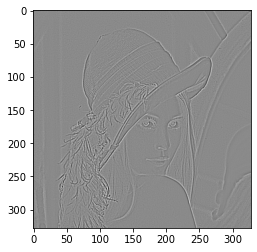

In [60]:
plt.imshow(do_conv_2d(lena, lap_f))

In [92]:
bw_img = cv2.cvtColor( cv2.imread('./bw.png'), cv2.COLOR_BGR2GRAY)

In [93]:
plt.gray()

<Figure size 432x288 with 0 Axes>

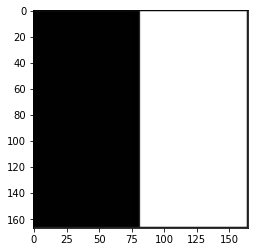

In [95]:
plt.imshow(bw_img)

In [100]:
# 3.26

In [111]:
def generate_lap_f(d):
    f = np.zeros((d, d))
    f[0, :] = 1
    f[:, 0] = 1
    f[d-1, :] = 1
    f[:, d-1] = 1
    
    f[d//2, d//2] = -np.sum(f)
    
    return f


array([[  1.,   1.,   1.,   1.,   1.],
       [  1.,   0.,   0.,   0.,   1.],
       [  1.,   0., -16.,   0.,   1.],
       [  1.,   0.,   0.,   0.,   1.],
       [  1.,   1.,   1.,   1.,   1.]])

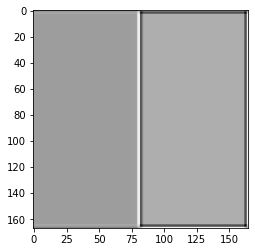

In [116]:
f1 = np.array((
    [1,1,1,1,1],
[1,0,0,0,1],
[1,0,-16,0,1],
[1,0,0,0,1],
[1,1,1,1,1],
            ))

f2 = np.array((
    [1,1,1,1,1,1,1],
    [1,0,0,0,0,0,1],
    [1,0,0,0,0,0,1],
    [1,0,0,-24,0,0,1],
    [1,0,0,0,0,0,1],
    [1,0,0,0,0,0,1],
    [1,1,1,1,1,1,1],
            ))

f3 = generate_lap_f(15)
f4 = generate_lap_f(25)


plt.imshow(bw_img + convolve2d(bw_img, f1, mode='same'))

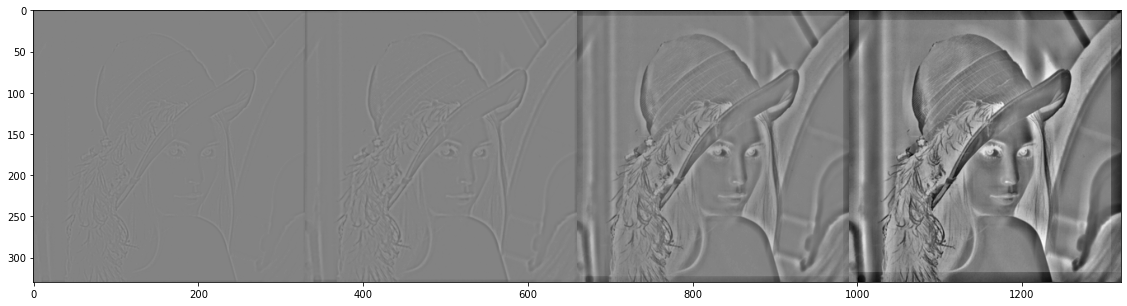

In [119]:
img_to_f = lena

res1 = convolve2d(img_to_f, f1, mode='same')
res2 = convolve2d(img_to_f, f2, mode='same')
res3 = convolve2d(img_to_f, f3, mode='same')
res4 = convolve2d(img_to_f, f4, mode='same')

plt.figure(figsize=(4*5, 5))
plt.imshow(np.hstack([res1, res2, res3, res4]))

In [120]:
# 3.24

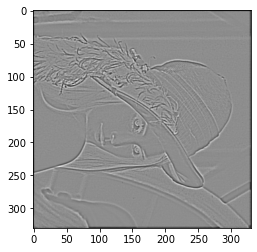

In [131]:
res11 = convolve2d( img_to_f, f1, mode='same')
res12 = cv2.rotate(res11, cv2.ROTATE_90_CLOCKWISE)

plt.imshow(res12)

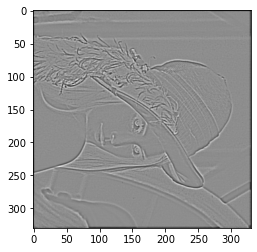

In [132]:
res21 = cv2.rotate( img_to_f, cv2.ROTATE_90_CLOCKWISE)
res22 = convolve2d(res21, f1, mode='same')

plt.imshow(res22)

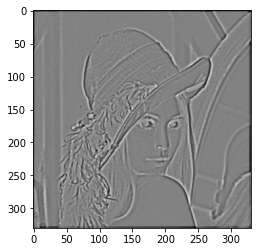

In [123]:
plt.imshow(convolve2d(img_to_f, f2, mode='same'))

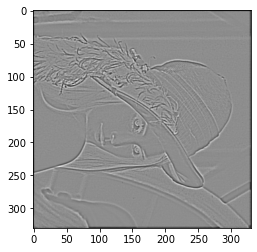

In [135]:
# rotating the kernel itself

res31 = cv2.rotate( img_to_f, cv2.ROTATE_90_CLOCKWISE)
res32 = convolve2d(res31, cv2.rotate(f1, cv2.ROTATE_90_CLOCKWISE), mode='same')

plt.imshow(res32)

In [133]:
res12 == res22

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])